In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [4]:
print(tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

2.16.2
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
df = pd.read_csv('data.csv')
df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,y18,z18,x19,y19,z19,x20,y20,z20,handedness,label
0,0.066402,0.714774,-5.149332e-07,0.110267,0.567437,-0.007399,0.177215,0.406313,-0.023405,0.211647,...,0.703239,-0.120772,0.228314,0.706775,-0.112544,0.189190,0.687547,-0.109797,0,1
1,0.067964,0.717013,-5.303769e-07,0.108681,0.570630,-0.008028,0.177440,0.409624,-0.023619,0.214079,...,0.707820,-0.117026,0.232774,0.712451,-0.107594,0.194152,0.693200,-0.103903,0,1
2,0.073413,0.720001,-5.408315e-07,0.113233,0.572339,-0.007361,0.182355,0.412784,-0.022473,0.218962,...,0.716653,-0.113614,0.238621,0.721244,-0.103292,0.199771,0.702700,-0.099165,0,1
3,0.079909,0.720517,-4.687542e-07,0.113828,0.574180,-0.010201,0.184310,0.419570,-0.026842,0.225137,...,0.723539,-0.112793,0.246905,0.729405,-0.101743,0.209507,0.711692,-0.096743,0,1
4,0.085028,0.720623,-4.441287e-07,0.117068,0.576235,-0.010575,0.186558,0.418234,-0.025969,0.225809,...,0.723339,-0.105736,0.253043,0.730022,-0.094346,0.217032,0.713488,-0.088924,0,1


In [8]:
X = df.drop('label', axis=1).values  # all columns except label
y = df['label'].values

In [9]:
# Scale features for better training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Build MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary output
])


/opt/anaconda3/envs/tf_arm/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-19 20:08:24.551715: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-07-19 20:08:24.552732: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-19 20:08:24.553614: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-19 20:08:24.553665: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-19 20:08:24.554357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Crea

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=32)


Epoch 1/30


2025-07-19 20:08:50.714895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9511 - loss: 0.1370 - val_accuracy: 1.0000 - val_loss: 9.2894e-04
Epoch 2/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9986 - loss: 0.0081 - val_accuracy: 0.9991 - val_loss: 0.0015
Epoch 3/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9991 - val_loss: 8.0849e-04
Epoch 4/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9991 - val_loss: 0.0013
Epoch 5/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9991 - loss: 0.0020 - val_accuracy: 0.9991 - val_loss: 8.9909e-04
Epoch 6/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9973 - loss: 0.0128 - val_accuracy: 0.9991 - val_loss: 0.0023
Epoch 7/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9991 - val_loss: 0.0038
Epoch 8/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9959 - loss: 0.0268 - val_acc

In [15]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9970 - loss: 0.0165

Test Accuracy: 99.82%


In [17]:
# Save the model and scaler
model.save('thumbs_mlp_model.keras')
import joblib
joblib.dump(scaler, 'scaler.save')

print("Model and scaler saved.")

Model and scaler saved.


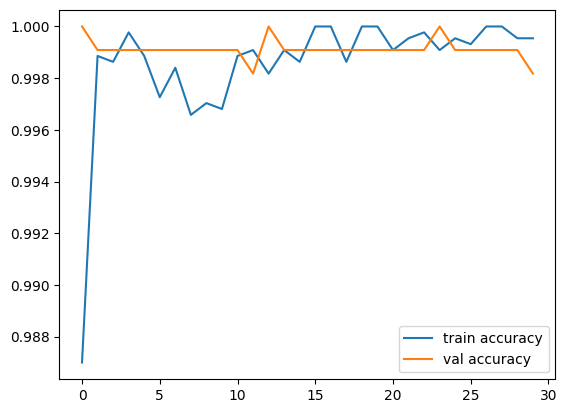

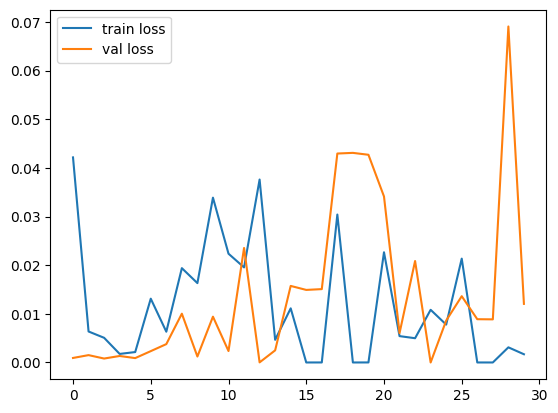

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()